In [1]:
import re
import pandas as pd
from konlpy.tag import Okt
from gensim import corpora, models

stopwords = [
    '은', '는', '이', '가', '을', '를', '에', '에서', '과', '와', '의', '로', '으로', '하다', '이다','한', '했다', '하고' ,'인','적','한','상'
    ,'게', '거', '말', '간', '축', '책', '작가', '이야기', '작품', '선', '란', '개', '다시', '독자', '베스트셀러', '정세랑', '김영하', '스', '대', '됭',
    '곤', '위', '된다', '지', '윤재', '출', '속', '소설', '장편소설', '자이니치', '사라마구'
    # 추가적인 불용어 추가
]

# 데이터 로드
data = pd.read_csv(r"국민대_전처리_완료.csv")  

# 전처리를 위한 토크나이저 생성
tokenizer = Okt()

# 전처리 함수 정의
def preprocess_text(text):
    tokens = tokenizer.morphs(text)  # 형태소 분석
    tokens = [re.sub('[\[\],\']', '', token) for token in tokens]  # '['와 ']' 사이의 문자 및 ',' 제거
    tokens = [token for token in tokens if token not in stopwords]  # 불용어 제거
    tokens = [token for token in tokens if token]  # Remove empty tokens
    # 추가적인 전처리 작업 수행
    return tokens

In [2]:
from gensim.models import Word2Vec
from gensim.corpora import Dictionary
import nltk

In [3]:
# 텍스트 전처리
data['preprocessed'] = data['책소개'].apply(preprocess_text) 

In [4]:
word2vec_model = Word2Vec(data['preprocessed'], min_count=1)

dictionary = Dictionary()
dictionary.doc2bow(word2vec_model.wv.index_to_key, allow_update=True)

# 단어 사전 및 문서-단어 행렬 생성
# dictionary = corpora.Dictionary(data['preprocessed'])
corpus = [dictionary.doc2bow(doc) for doc in data['preprocessed']]

In [5]:
# LDA 모델 훈련
num_topics = 5 # 토픽 개수
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# 토픽별 단어 출력
for topic_idx in range(num_topics):
    print(f"토픽 {topic_idx+1}:")
    words = lda_model.show_topic(topic_idx, topn=10)
    for word, prob in words:
        print(f"{word}: {prob:.4f}")
    print() 

토픽 1:
변화: 0.0065
김훈: 0.0057
안중근: 0.0057
사회: 0.0049
대한: 0.0049
반도체: 0.0049
있도록: 0.0041
하여: 0.0041
삶: 0.0041
하얼빈: 0.0041

토픽 2:
사랑: 0.0133
기술: 0.0085
프롬: 0.0085
감정: 0.0057
버스: 0.0056
세계: 0.0050
없는: 0.0050
메타: 0.0049
질문: 0.0043
인가: 0.0043

토픽 3:
세계: 0.0066
파친코: 0.0055
첫: 0.0045
한국인: 0.0044
꿈: 0.0039
될: 0.0039
진: 0.0039
질문: 0.0039
역사: 0.0034
이민: 0.0034

토픽 4:
차별: 0.0082
편의점: 0.0064
삶: 0.0059
대한: 0.0059
서점: 0.0058
혐오: 0.0041
경영학: 0.0041
데: 0.0036
현장: 0.0035
종합: 0.0035

토픽 5:
경영: 0.0101
하며: 0.0039
기업: 0.0039
현대: 0.0039
자청: 0.0039
첫: 0.0032
새로운: 0.0032
못: 0.0032
저자: 0.0032
이라는: 0.0032



In [6]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model = CoherenceModel(model=lda_model, texts=data['preprocessed'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print("일관성 점수:", coherence_score)

일관성 점수: 0.3868015062743323


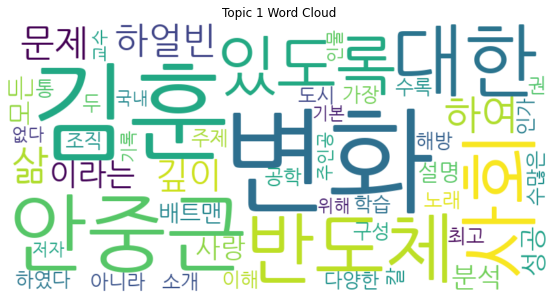

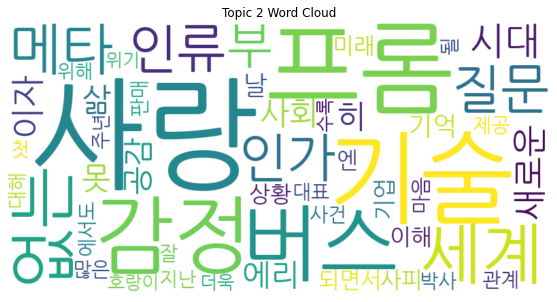

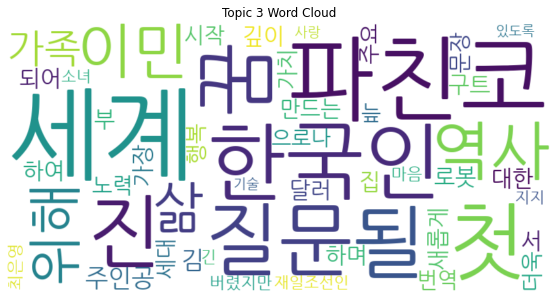

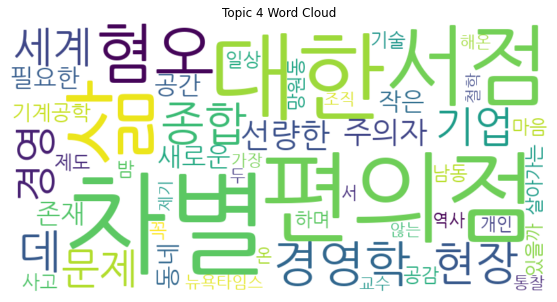

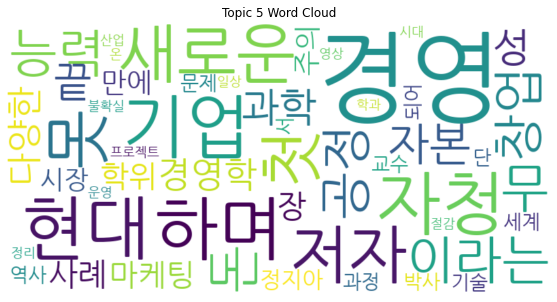

In [7]:
# 워드클라우드 코드 (각자 조정)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Generate word cloud for each topic
for topic_idx in range(num_topics):
    topic_words = lda_model.show_topic(topic_idx, topn=50)
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='NanumGothic.ttf').generate_from_frequencies(dict(topic_words))
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {topic_idx+1} Word Cloud")
    plt.axis('off')
    plt.show()

In [8]:
# 텍스트 전처리
data['preprocessed'] = data['저자소개'].apply(preprocess_text) 

In [9]:
word2vec_model = Word2Vec(data['preprocessed'], min_count=1)

dictionary = Dictionary()
dictionary.doc2bow(word2vec_model.wv.index_to_key, allow_update=True)

# 단어 사전 및 문서-단어 행렬 생성
# dictionary = corpora.Dictionary(data['preprocessed'])
corpus = [dictionary.doc2bow(doc) for doc in data['preprocessed']]

In [10]:
# LDA 모델 훈련
num_topics = 5 # 토픽 개수
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# 토픽별 단어 출력
for topic_idx in range(num_topics):
    print(f"토픽 {topic_idx+1}:")
    words = lda_model.show_topic(topic_idx, topn=10)
    for word, prob in words:
        print(f"{word}: {prob:.4f}")
    print() 

토픽 1:
정의: 0.0079
학위: 0.0054
경영: 0.0054
철학: 0.0054
샌델: 0.0053
대학교: 0.0041
세계: 0.0041
교수: 0.0041
대학: 0.0041
기술: 0.0041

토픽 2:
문학: 0.0069
반도체: 0.0064
사회: 0.0059
하였다: 0.0054
집: 0.0045
대학교: 0.0045
이라는: 0.0040
연: 0.0040
문제: 0.0035
미국: 0.0035

토픽 3:
세계: 0.0094
문학상: 0.0068
대학: 0.0061
일본: 0.0054
시작: 0.0041
하며: 0.0041
미국: 0.0041
했고: 0.0041
번째: 0.0041
주요: 0.0041

토픽 4:
트렌드: 0.0114
경영: 0.0053
경: 0.0053
경영학: 0.0042
영국: 0.0042
코리아: 0.0042
교수: 0.0037
하며: 0.0037
집: 0.0037
경제: 0.0037

토픽 5:
연구: 0.0091
하였다: 0.0063
철학: 0.0056
대학: 0.0056
도시: 0.0056
플라톤: 0.0050
로봇: 0.0049
교수: 0.0043
대학교: 0.0043
만화: 0.0042



In [11]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model = CoherenceModel(model=lda_model, texts=data['preprocessed'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print("일관성 점수:", coherence_score)

일관성 점수: 0.32010281988394695


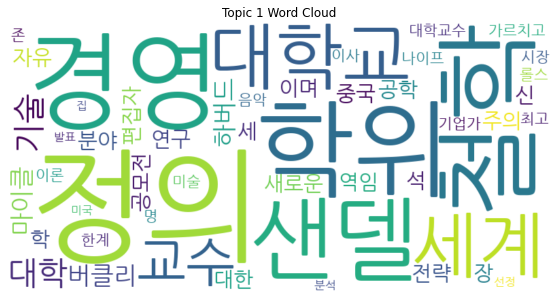

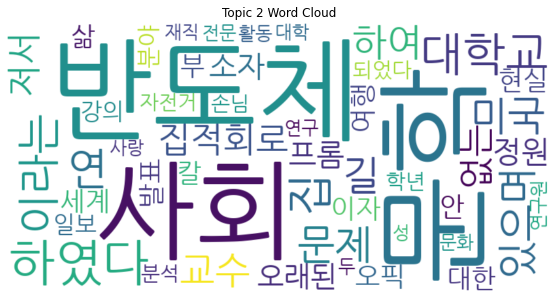

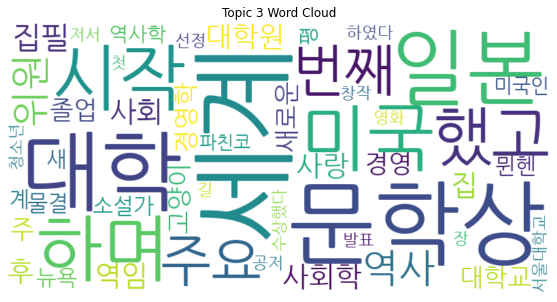

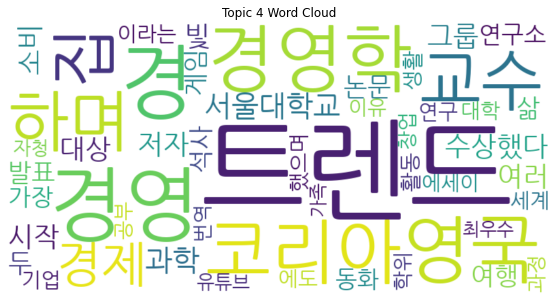

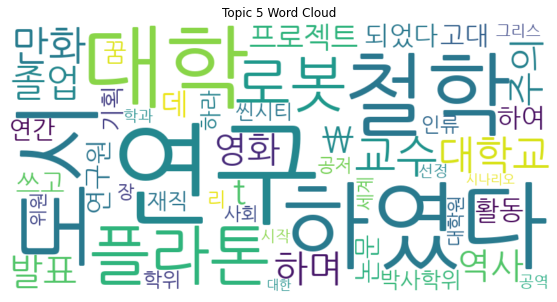

In [12]:
# 워드클라우드 코드 (각자 조정)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Generate word cloud for each topic
for topic_idx in range(num_topics):
    topic_words = lda_model.show_topic(topic_idx, topn=50)
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='NanumGothic.ttf').generate_from_frequencies(dict(topic_words))
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {topic_idx+1} Word Cloud")
    plt.axis('off')
    plt.show()